# <img src="https://codehs.com/uploads/621e93dcea42ef17cb8c48aaceef5b90" width="150"> Temperature Conversion in TensorFlow





# Getting Started

Welcome to the Temperature Model Colab. A colab is an interactive notebook that allows you to run and edit the code. Everything on this page is editable and you can save your own version of this notebook to your Google drive.

In this notebook, you will take a look at writing a machine code to calculate temperature. Remember, the formula for temperature is:

$$ °F = 1.8 \times °C + 32 $$

Even though we know the formula, the computer doesn't. The purpose of the model is to have the computer learn the formula by transforming the input and comparing it to the expected output.


### Watch The Video For This Section

Click Watch on YouTube to expand.

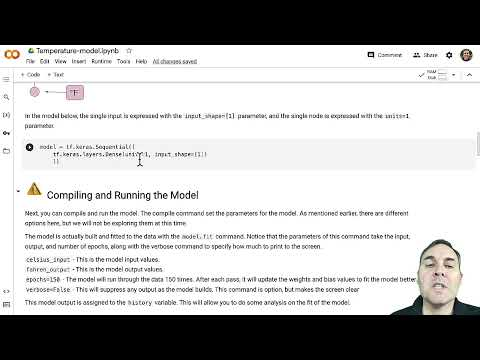

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('V1sJm__g1B0')

# Update TensorFlow Version

To ensure that everyone can successfully run the code in this notebook, we will be installing a specific version of TensorFlow. This approach maintains consistency and minimizes the chances of errors due to version differences, making it easier to follow along with the instructions and examples.

The code below first uninstalls the current TensorFlow version (usually the most up-to-date one) and then installs TensorFlow version 2.15.

In [ ]:
!pip uninstall tensorflow -y
!pip install tensorflow==2.15 -q > /dev/null 2>&1

## <img src="https://codehs.com/uploads/dc8d8e3a41aa5f3226b3a5a0e883108b" width="50"> Import TensorFlow

The first step in your program is to import the TensorFlow library into Python. Hover over the `[ ]` to see the run button and click it. You should get a check mark once that part of the code has run.

Often times, this is your starting point and many times you will see all the import statements you need at the start.

*Remember, you will get a warning when you go to run the Colab, but it is safe to execute.*

In [ ]:
import tensorflow as tf

## <img src="https://codehs.com/uploads/dc8d8e3a41aa5f3226b3a5a0e883108b" width="50"> Set Up Training Data
Next, we need to create two variables for the input and output data to use to train the model.

For now, let's use 5 different input and output values. These values are stored in a Python list and will be fed into the model directly.


Later, you will experiment with adding additional values.

In [ ]:
celsius_input = [-40, 0, 15, 22, 100]
fahren_output = [-40, 32, 59, 72, 212]

# <img src="https://codehs.com/uploads/b3ed72f9d4f6fced3550163f4b1617de" width="50"> Creating the TensorFlow Model

The model we use is limited to one input (Celsius temperature) and one output (Fahrenheit temperature), but the number of hidden layers and nodes can be altered. The more complex the model is, the more nodes and layers you will want to use. Since we know that the temperature model is very simple and can be modeled with just one node, let's start there.

<img src="https://codehs.com/uploads/0f23a241373237aed063d0b5d8573036" width="300">


In the model below, the single input is expressed with the `input_shape=[1]` parameter, and the single node is expressed with the `units=1` parameter.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
    ])

## <img src="https://codehs.com/uploads/b3ed72f9d4f6fced3550163f4b1617de" width="50"> Compiling and Running the Model

Next, you can compile and run the model. The compile command set the parameters for the model. As mentioned earlier, there are different options here, but we will not be exploring them at this time.

The model is actually built and fitted to the data with the `model.fit` command. Notice that the parameters of this command take the input, output, and number of epochs, along with the verbose command to specify how much to print to the screen.


`celsius_input` - This is the model input values.<br>
`fahren_output` - This is the model output values.<br>
`epochs=150` - The model will run through the data 150 times. After each pass, it will update the weights and bias values to fit the model better.<br>
`verbose=False` - This will suppress any output as the model builds. This command is option, but makes the screen clear<br>


This model output is assigned to the `history` variable. This will allow you to do some analysis on the fit of the model.

## <img src="https://codehs.com/uploads/dc8d8e3a41aa5f3226b3a5a0e883108b" width="50"> Run the code
When you run this code, expect it to take a few seconds to execute as it is running through the data 150 times.


In [ ]:
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))

history = model.fit(celsius_input, fahren_output, epochs=500, verbose=False)

### Watch The Video For This Section

Click Watch on YouTube to expand.

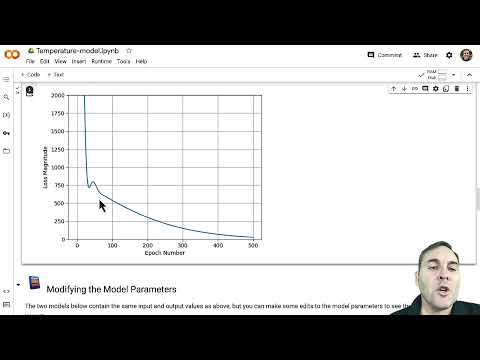

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('eflRGpQ5KhQ')

## <img src="https://codehs.com/uploads/dc8d8e3a41aa5f3226b3a5a0e883108b" width="50"> Viewing the Results

Now that the model has run, you can use it to predict a value.

In [ ]:
print("Predict for 100 degrees C: " + str(model.predict([100])))

print ("Model variables weights: " + str(model.layers[0].get_weights()[0]))
print ("Model bias: " + str(model.layers[0].get_weights()[1]))

How did the model do? It probably didn't predict 212 degrees, but depending on your run, it was probably within a few degrees. Each time you run the model, you may get different resuts, you your results may vary.

You can also look at the weight and bias to see how close it came to the actual equation.

$$  °F = WEIGHT × °C + BIAS $$
$$  °F = 1.8 × °C + 32 $$

## Model Metrics
In upcoming lessons, you will look deeper into model fit metrics, but for now, let's take a look at the loss metrics.

Each time an epoch runs, it assigns a value for the weight and bias. The model uses these values with the input value (temperature in celsius) to predict an output value (temperature in fahrenheit). The **loss value** is the difference between the predicted output and the actual output.



## <img src="https://codehs.com/uploads/dc8d8e3a41aa5f3226b3a5a0e883108b" width="50"> Import matplotlib and Plot Loss data

Run the code below to see a measure of the loss value. Notice how the loss gets smaller over time. This represents the model fitting a little better with each pass.

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.ylim(0,2000)
plt.grid()
plt.plot(history.history['loss'])
plt.show()

### Watch The Video For This Section

Click Watch on YouTube to expand.

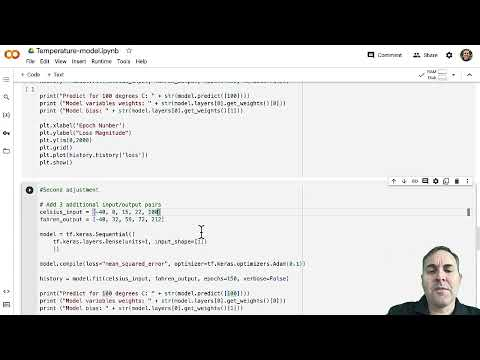

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('K66zNRfJk7Q')

## <img src="https://codehs.com/uploads/91c1007825668faf96413e19a3693bcf" width="50"> Modifying the Model Parameters


The two models below contain the same input and output values as above, but you can make some edits to the model parameters to see the impact.


Try each of the following and note the results. You will enter these back in the CodeHS platform.  


<img src="https://codehs.com/uploads/92cc42365dc1b9ad4a78334f63a60367" width="25"> For each of these, you will want to compare three things:

**The loss graph:** Does the tail flatten out? What is the estimated loss in the end?


**Run time:** Notice the time that it takes to run each. Nearly all of the time is calculating the model, so you can compare this to the original model.fit code above.


1. Change the number of epochs that you run from 150 to 300.


2. Keep the epochs at 150. Add 3 additional input and output values. You can pick any Celsius input value and calculate the Fahrenheit value using the 1.8*C + 32 formula.


In [ ]:
# First Adjustment
celsius_input = [-40, 0, 15, 22, 100]
fahren_output = [-40, 32, 59, 72, 212]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
    ])

model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))
# Update the number of Epochs in this model
history = model.fit(celsius_input, fahren_output, epochs=150, verbose=False)

print("Predict for 100 degrees C: " + str(model.predict([100])))
print ("Model variables weights: " + str(model.layers[0].get_weights()[0]))
print ("Model bias: " + str(model.layers[0].get_weights()[1]))

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.ylim(0,2000)
plt.grid()
plt.plot(history.history['loss'])
plt.show()


In [ ]:
#Second adjustment

# Add 3 additional input/output pairs
celsius_input = [-40, 0, 15, 22, 100]
fahren_output = [-40, 32, 59, 72, 212]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
    ])

model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))

history = model.fit(celsius_input, fahren_output, epochs=150, verbose=False)

print("Predict for 100 degrees C: " + str(model.predict([100])))
print ("Model variables weights: " + str(model.layers[0].get_weights()[0]))
print ("Model bias: " + str(model.layers[0].get_weights()[1]))

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.ylim(0,2000)
plt.grid()
plt.plot(history.history['loss'])
plt.show()

### Watch The Video For This Section

Click Watch on YouTube to expand.

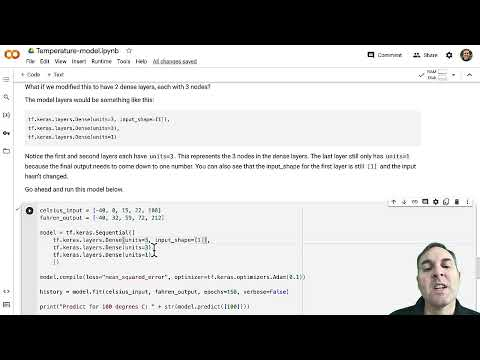

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('oTRBdOanN1w')

## <img src="https://codehs.com/uploads/dc8d8e3a41aa5f3226b3a5a0e883108b" width="50"> <img src="https://codehs.com/uploads/b3ed72f9d4f6fced3550163f4b1617de" width="50"> Modifying the Model

For this problem, we said that the model was pretty simple and one node in one layer was enough to generate good results.

What if we modified this to have 2 dense layers, each with 3 nodes?

The model layers would be something like this:
```
tf.keras.layers.Dense(units=3, input_shape=[1]),
tf.keras.layers.Dense(units=3),
tf.keras.layers.Dense(units=1)
```

Notice the first and second layers each have `units=3`. This represents the 3 nodes in the dense layers. The last layer still only has `units=1` because the final output needs to come down to one number. You can also see that the input_shape for the first layer is still `[1]` and the input hasn't changed.

Go ahead and run this model below.

In [ ]:
celsius_input = [-40, 0, 15, 22, 100]
fahren_output = [-40, 32, 59, 72, 212]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=3, input_shape=[1]),
    tf.keras.layers.Dense(units=3),
    tf.keras.layers.Dense(units=1)
    ])

model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))

history = model.fit(celsius_input, fahren_output, epochs=150, verbose=False)

print("Predict for 100 degrees C: " + str(model.predict([100])))

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.ylim(0,2000)
plt.grid()
plt.plot(history.history['loss'])
plt.show()

Notice that the model predicted about the same, but with a lot more complexity. When creating models, you want to keep your model as simple as possible, and that will be determined by your dataset.


## <img src="https://codehs.com/uploads/91c1007825668faf96413e19a3693bcf" width="50"> Your Turn


Now it is your turn to create a model. Use what you have learned here to modify the model in a way that you think will run efficiently and predict well.


The starter code below has most of what you need, but you will need to create the model and outline the parameters to fit the model. Feel free to copy and paste lines of code from above!


When you are done, you will answer questions about this model in the CodeHS editor.


Remember to save a copy of this notebook on your Google Drive in case you need to come back to it in the future!

In [ ]:
# Add additional training data here, if needed
celsius_input = [-40, 0, 15, 22, 100]
fahren_output = [-40, 32, 59, 72, 212]

# Define the layers of your model here
# How many do you need?
model = tf.keras.Sequential([


    ])

model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))

# Be sure to specify the number of epochs to use
history = model.fit(celsius_input, fahren_output, epochs=??, verbose=False)

print("Predict for 100 degrees C: " + str(model.predict([100])))

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.ylim(0,2000)
plt.grid()
plt.plot(history.history['loss'])
plt.show()